<a href="https://colab.research.google.com/github/atlas-github/vizzcomparison/blob/master/Matplotlib_vs_Seaborn_vs_Plotly.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import pandas as pd
df = pd.read_csv("sample-users.csv")
df

,user_id,birth_year,country,user_settings,plan
0,user_0,1989,Poland,1,Regular
1,user_1,1975,United Kingdom,0,Regular
2,user_2,1987,Poland,0,Regular
3,user_3,1994,France,0,Regular
4,user_4,1985,United Kingdom,0,Regular
...,...,...,...,...,...
16271,user_19425,1994,Ireland,0,Regular
16272,user_19426,1977,Estonia,0,Regular
16273,user_19427,1991,Poland,0,Regular
16274,user_19428,1984,United Kingdom,0,Regular


In [86]:
group = df.groupby(['country', 'plan'])['plan'].aggregate('count').unstack().reset_index()
group

plan,country,Premium,Regular,Special
0,Denmark,22,409,15
1,Estonia,31,939,21
2,France,101,1925,84
3,Ireland,41,1137,36
4,Lithuania,10,630,6
5,Malta,17,510,21
6,Poland,41,2231,34
7,Portugal,16,577,11
8,Romania,78,966,52
9,United Kingdom,357,5809,149


In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

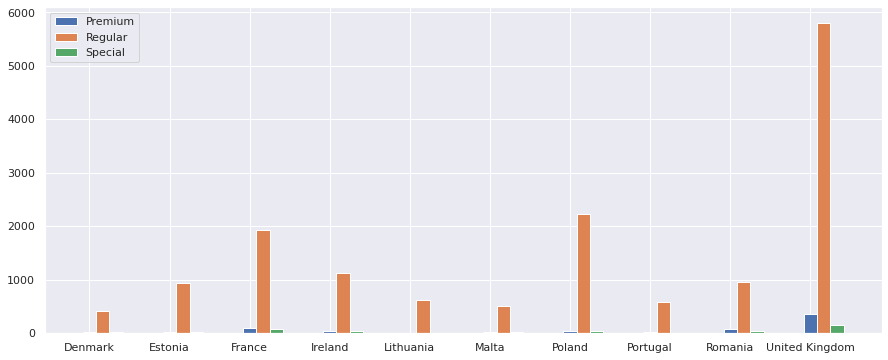

In [119]:
barWidth = 0.5

r1 = [1,4,7, 10, 13, 16, 19, 22, 25, 28]
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

fig, ax = plt.subplots(figsize=(15, 6))
plt.bar(r1, group.iloc[:, 1], label="Premium", width = barWidth)
plt.bar(r2, group.iloc[:, 2], label="Regular", width = barWidth)
plt.bar(r3, group.iloc[:, 3], label="Special", width = barWidth)
plt.legend()

plt.xticks(r1, ['Denmark', 'Estonia', 'France', 'Ireland', 'Lithuania', 'Malta', 'Poland', 'Portugal', 'Romania', 'United Kingdom'])

plt.show()

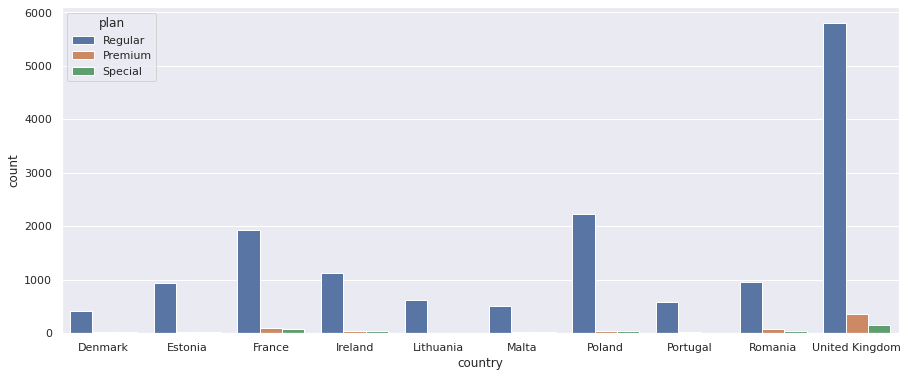

In [67]:
plt.figure(figsize = (15, 6))
import seaborn as sns
sns.set(style="darkgrid")
ax = sns.countplot(x="country", hue="plan", data=df, order = group.iloc[:, 0])

In [68]:
import plotly.graph_objects as go
order=group.iloc[:, 0]

fig = go.Figure(data=[
    go.Bar(name='Regular', x=order, y=group.iloc[:, 2]),
    go.Bar(name='Premium', x=order, y=group.iloc[:, 1]),
    go.Bar(name='Special', x=order, y=group.iloc[:, 3])
])
# Change the bar mode
fig.update_layout(barmode='group')
fig.show()